# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
## Setup environment and import of essential packages
# Tensorflow, Panda & NumPy are mandatory packages

import tensorflow as tf
import pandas as pd
import numpy as np
import random
import itertools

# Import and load data along with random selection package dependencies
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn.model_selection
from sklearn.utils import shuffle
import csv
import zipfile
from urllib.request import urlretrieve

# Common utilities for miscellenous purposes & output format
import time
from datetime import timedelta
import math
import os
import seaborn as sns
sns.set_style("whitegrid")


# Image pre processing libraries, dependencies and utilities
import scipy
from scipy import linalg
import scipy.ndimage as ndi
from skimage import transform, exposure
from skimage.util import random_noise
import skimage

# Open CV for Images pre processing
import cv2

In [2]:
## DNN/CNN Model Architecture - Global Variable
STD_DEV = .062            # Weights standard deviation
BAIS_STD_DEV = .062       # Baises standard deviation

# Training Data's - Global variable
n_epochs = 225             # Learning iteration
train_batch_size = 100     # Training data batch size
test_batch_size = 100      # Test data batch size

---
## Step 0: Load The Data

Step-0 Download dataset 
A download link provided to read traffic signs dataset. Reference link is:
    
https://d17h27t6h515a5.cloudfront.net/topher/2016/October/5811165e_traffic-signs-data.zip/traffic-signs-data.zip.zip

Rename train.p and test.p to train.pickle and test.pickle, respectively to in file system.

In [3]:
# Name of the model to be used. If None, the network will be retrained
network_model_dir = None  # 'model/2017-12-20_094622'

In [4]:
def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    print('Downloading ' + file + '...')
    if not os.path.isfile(file):
        urlretrieve(url, file)
        print('Download Finished')
    else:
        print('File already in the filesystem!')

download('https://d17h27t6h515a5.cloudfront.net/topher/2016/October/5811165e_traffic-signs-data.zip/traffic-signs-data.zip.zip', 'traffic-signs-data.zip.zip')

File already in the filesystem!


In [5]:
train_filename = 'train.pickle'
test_filename = 'test.pickle'

if not os.path.isfile(train_filename) or not os.path.isfile(test_filename):
    # Unzip
    print('Unzipping file...')
    with zipfile.ZipFile("traffic-signs-data.zip.zip","r") as zip_ref:
        zip_ref.extractall()

    # Rename    
    print('Renaming pickle files...')
    os.rename('train.p', 'train.pickle')
    os.rename('test.p', 'test.pickle')
    print('Done')
else:
    print('Pickle files already in the filesystem!')

Pickle files already in the filesystem!


#### Load data approach
OS and URL download libraries are used for content fetching from a site. OS primitives along with pickel helped in unziping and renaming file system data. Now we are all set to go ahead with variables (train_filename, test_filename)  loaded data. Data download, unzip will execute once and rest of the scenario's file availability on local system will checked.

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [6]:
# Load pickled data
training_file = 'train.pickle'
testing_file = 'test.pickle'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
### To start off let's do a basic data summary.
# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
image_shape = X_train.shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


In [8]:
# Data exploratory - shape outlook
# Shapes of the input arrays

print("X_train.shape = ", X_train.shape)
print("y_train.shape = ", y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ", y_test.shape)

X_train.shape =  (39209, 32, 32, 3)
y_train.shape =  (39209,)
X_test.shape =  (12630, 32, 32, 3)
y_test.shape =  (12630,)


#### Basic summary of data
Data provided has 39209 training samples, 12630 testing samples and total number of unique classes are 43. Every sign image is of pixels - 32, 32, 3

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

4


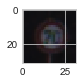

In [9]:
### Data exploration visualization code goes here.

# A single image reading and display
index=random.randint(0, len(X_train))
image =X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

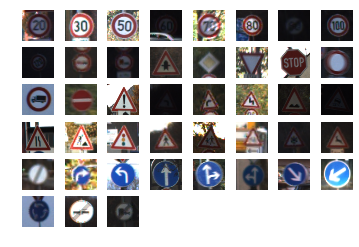

In [10]:
# Plot one example of the 43 different classes, Simplistic visualization
_, idx = np.unique(y_test, return_index=True)
X_test_unique = X_test[idx, :, :, :]
for i in range(0, len(idx)):
    plt.subplot(6, 8, i+1);
    plt.imshow(X_test_unique[i, :, :, :]);
    plt.axis('off');

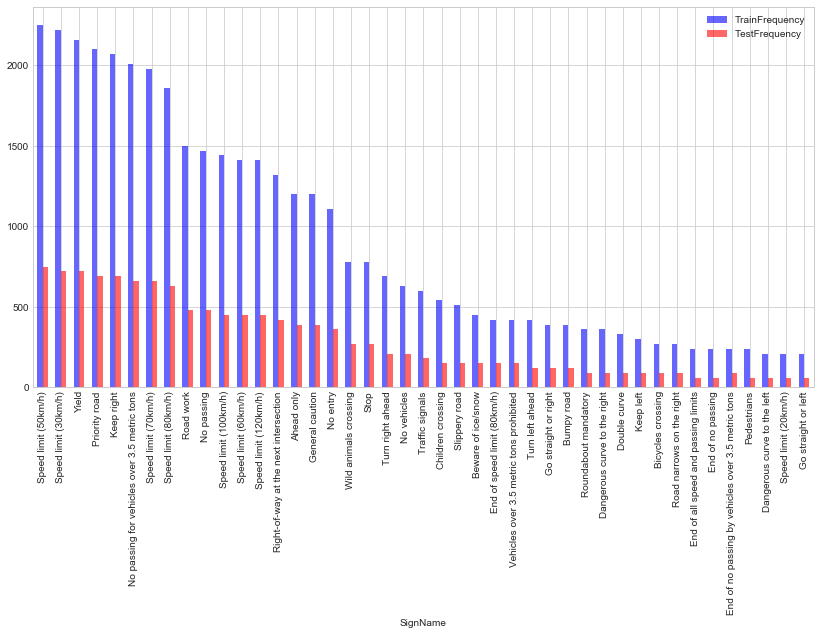

In [11]:
### Plot number of examples - summary and graph
### Load sign name, prepare data frame and plot 

signnames = pd.read_csv("signnames.csv")   ## load signs in a variable

traindata = pd.DataFrame(y_train, columns=["ClassId"])    ## Prepare train data in class D format
traindata = traindata.merge(signnames, how="left", left_on="ClassId", right_on="ClassId")
traindata = traindata.rename(columns={'ClassId': 'TrainFrequency'})

testdata = pd.DataFrame(y_test, columns=["ClassId"])   # Build data for testing
testdata = testdata.merge(signnames, how="left", left_on="ClassId", right_on="ClassId")
testdata["TestFrequency"] = 1

datacount = traindata.groupby(["SignName"]).count()  # Groupby for Test summary
datacount = datacount.join(testdata.groupby(["SignName"])["TestFrequency"].count())
datacount = datacount.sort_values(by="TrainFrequency", ascending=False)


datacount.plot.bar(figsize=(14, 7), color=['b','r'], width=.6, alpha=0.6) # plot it
plt.show()

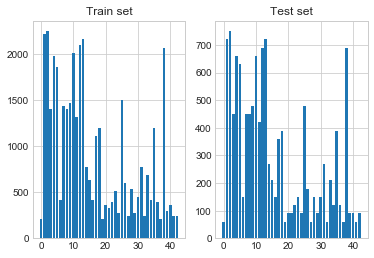

In [12]:
# Alternative visualization of examples for each class, for training and test set
def get_class_distribution(y, n_classes):
    labels = np.array(range(0, n_classes))
    n_examples = np.zeros(n_classes, dtype=np.int32)
    for i in labels:
        # Get indices in Y that correspond to 'i', for train and test sets
        n_examples[i] = sum(y == i)
        
    return (labels, n_examples)
    
# Plot in a bar diagram
plt.subplot(1,2,1)
labels, dist_train = get_class_distribution(y_train, n_classes)
plt.bar(labels, dist_train);
plt.title('Train set');
plt.subplot(1,2,2)
labels, dist_test = get_class_distribution(y_test, n_classes)
plt.bar(labels, dist_test);    
plt.title('Test set');

#### Traffic sign data summary, analysis and observations
Data sample statitics of each symbol plotted in acending order by leveraging Panda. 

Data example plot summary clearly depicts examples are not equally distributed. The examples who have more sample for training will give more accuracy, rest sign may have lesser accuracy. 

If we want to improve DNN/CNN network's ability to generalize, we should have nearly same number of examples for each class and in high numbers.

##### Alternative visualization - seperately visualize by plotingTrain & Test for a different snap

In [13]:
### PLOT SIGN IMAGES FUNCTION Function used to plot M images in a grid of NxN
### Alternative mechanism of visualization 

import matplotlib.gridspec as gridspec

GRID_WIDTH = 4     # Number of signs in a row
GRID_HEIGHT = 6    # Number of rows to Diaplay

def plot_images(start_idx, end_idx):
    gs = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH, top=1., bottom=-0.2, right=2., left=0., hspace=0.3, wspace=0.2)
    
    i = 0    
    # Get indexes of each example from each class
    for sign_type in datacount[start_idx:end_idx].index:
        idxs = traindata[traindata["SignName"] == sign_type].index.tolist()
        ax = plt.subplot(gs[i])
        ax.imshow(X_train[idxs[100]])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(sign_type)
        
        i+=1

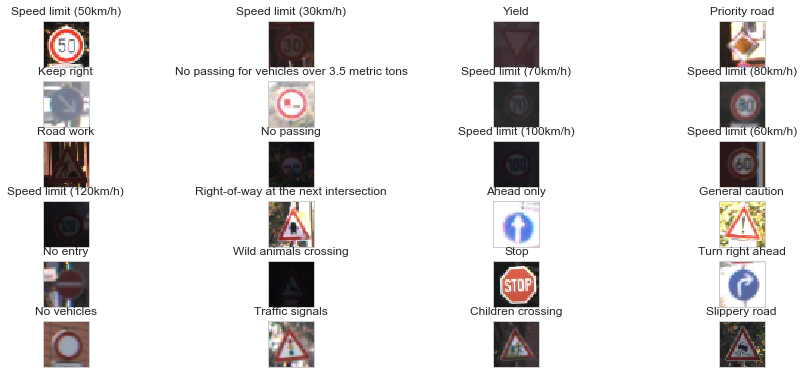

In [14]:
### Plot Images - This is in sequence 
# Function could be randomize for a set of Signs

M =  0    # Start Image Index
N = 24    # End image Index

plot_images(M,N)

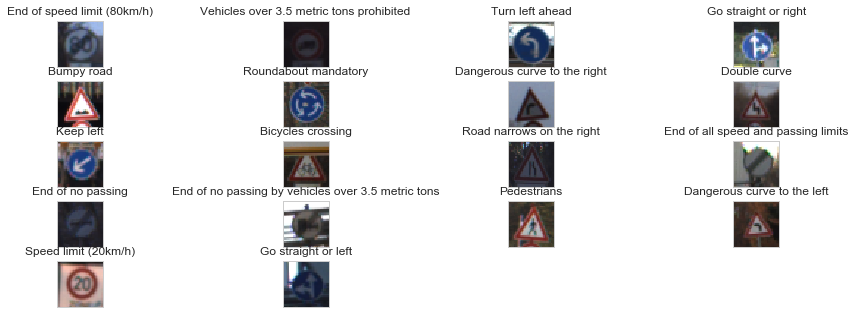

In [15]:
# Plot next set of Signs - 25 to 42 
plot_images(25, 64)

In [16]:
# Print the labels
labels_text = []
with open('signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in reader:
        print(', '.join(row))        
        if i > 0:
            labels_text.append(row[1])        
        i = i + 1

ClassId, SignName
0, Speed limit (20km/h)
1, Speed limit (30km/h)
2, Speed limit (50km/h)
3, Speed limit (60km/h)
4, Speed limit (70km/h)
5, Speed limit (80km/h)
6, End of speed limit (80km/h)
7, Speed limit (100km/h)
8, Speed limit (120km/h)
9, No passing
10, No passing for vehicles over 3.5 metric tons
11, Right-of-way at the next intersection
12, Priority road
13, Yield
14, Stop
15, No vehicles
16, Vehicles over 3.5 metric tons prohibited
17, No entry
18, General caution
19, Dangerous curve to the left
20, Dangerous curve to the right
21, Double curve
22, Bumpy road
23, Slippery road
24, Road narrows on the right
25, Road work
26, Traffic signals
27, Pedestrians
28, Children crossing
29, Bicycles crossing
30, Beware of ice/snow
31, Wild animals crossing
32, End of all speed and passing limits
33, Turn right ahead
34, Turn left ahead
35, Ahead only
36, Go straight or right
37, Go straight or left
38, Keep right
39, Keep left
40, Roundabout mandatory
41, End of no passing
42, End of n

#### Lables summary
Data set provided a comma seperated version (CSV) file for symboles description. CSV reader utility leveraged for delimiter comma. All lables text appended in an array and printed for visualization. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Data preprocess approach taken 
######  (a) Shuffle data set - randomize training data
######  (b) Create equal amount of fake data by applying following approach 
######         - Transformation mechanism
######         - Rotation
######         - Shift
######         - Offset
######         - Shear
######   (c) Gray scaling of data images

###### In pre processing, by fake data ingestion  approx 10x amount of image data added into original data set. Network accuracy depends of amount of available training data. By basic analysis (first iteration of Lenet) i sensed this much data is not allowing us to incease accuracy beyond 90%
###### As mentioned in video lecture's RGB data set is having 3 times colour information which could be slashed by gray scale mechanism and nearly same level of results could be achieved. Moreover RGB increases compute overheads and time of training a network. 
###### Shuffling data dilutes any sort of baises in available datasets i.e bring randomization

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

X_train, y_train = shuffle(X_train, y_train)

In [18]:
### Pre Process Steps for randomized approaches !!
def apply_affine_transform(img, T):
    rows, cols, ch = img.shape
    return cv2.warpAffine(img, T, (cols, rows))

def random_translate(img, max_relative_displacement = 0.1):
    h, w =  img.shape[0:2]
    
    tx = np.random.uniform(-max_relative_displacement * w, max_relative_displacement * w)
    ty = np.random.uniform(-max_relative_displacement * h, max_relative_displacement * h)
    
    T = np.array([[1.0, 0.0, tx], [0.0, 1.0, ty]], dtype = np.float32)

    return apply_affine_transform(img, T)

def random_rotate(img, max_angle_degrees = 5.0):
    theta = np.random.uniform(-max_angle_degrees, max_angle_degrees) * np.pi/180.0
    
    c = np.cos(theta)
    s = np.sin(theta)
    
    T = np.array([[c, -s, 0.0], [s, c, 0.0]], dtype = np.float32)
    return apply_affine_transform(img, T)

def random_scale(img, max_scale_factor = 0.05):    
    sx = 1.0 + np.random.uniform(-max_scale_factor, max_scale_factor)
    sy = 1.0 + np.random.uniform(-max_scale_factor, max_scale_factor)
    
    T = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0]], dtype = np.float32)
    return apply_affine_transform(img, T)

def random_shear(img, max_sheer_factor = 0.05):
    kx = np.random.uniform(-max_sheer_factor, max_sheer_factor)
    ky = np.random.uniform(-max_sheer_factor, max_sheer_factor)
    
    T = np.array([[1.0, kx, 0.0], [ky, 1.0, 0]], dtype = np.float32)
    return apply_affine_transform(img, T)

def jitter_image(img):
    fnc = np.random.randint(0, 4)
    
    if fnc == 0:
        return random_translate(img)    
    elif fnc == 1:
        return random_rotate(img)    
    elif fnc == 2:
        return random_scale(img)
    else:
        return random_shear(img)        
    
def generate_fake_data(X, y, old_class_distribution, extend_factor = 10):
    X_fake = []
    y_fake = []
    
    # Get minimum final size of dataset, as well as nr of images per class
    final_size = extend_factor * X.shape[0]
    n_classes = len(old_class_distribution)
    n_images_per_class = int(np.ceil(final_size / n_classes))
    
    for i in range(X.shape[0]):
        # Compute number of required images
        class_idx = y[i]
        current_distribution_i = old_class_distribution[class_idx]        
        n_fake_images = int(np.ceil((n_images_per_class - current_distribution_i) / current_distribution_i))        
        
        # Generate fake images
        for j in range(n_fake_images):
            X_fake.append(jitter_image(X[i]))
            y_fake.append(y[i])
        
    return (np.array(X_fake), np.array(y_fake))

def extend_training_data(X, y, old_class_distribution):
    X_fake, y_fake = generate_fake_data(X, y, old_class_distribution)
    
    X = np.concatenate((X, X_fake), axis = 0)
    y = np.concatenate((y, y_fake), axis = 0)
    
    return (X, y)

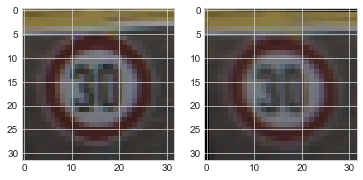

In [19]:
x_in = X_train[1000]
x_out = jitter_image(x_in)

plt.subplot(1,2,1)
plt.imshow(np.squeeze(x_in), cmap='gray');
plt.subplot(1,2,2)
plt.imshow(np.squeeze(x_out), cmap='gray');

Extended training set size:  (413776, 32, 32, 3)


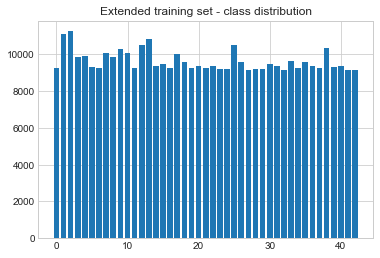

In [20]:
# Extended training set with fake data
_, old_distribution = get_class_distribution(y_train, n_classes)
X_train, y_train = extend_training_data(X_train, y_train, old_distribution)
print('Extended training set size: ', X_train.shape)

# Plot new class distribution. It should be close to a uniform distribution
labels, dist_train = get_class_distribution(y_train, n_classes)
plt.bar(labels, dist_train);
plt.title('Extended training set - class distribution');

### ### Preprocess the data here ####
#####  Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

X_train = X_train_gry
X_test = X_test_gry

print('Done')

#### Pre processing RGB to Grayscale conversion
I have tried 2 different approaches, one mentioned above as marked down segment which was actually slowing down my CPU/GPU setup a lot. Another method tried for standard Open CV function which seems faster.


In [21]:
### RGB to grayscale conversion. According to the paper, it gives better results
def rgb_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Normalization: zero mean and unit variance
def normalization(x):
    a = 0.1
    b = 0.9
    x_min = 0
    x_max = 255
    
    return a + (x - x_min) * (b - a) / (x_max - x_min)

def preprocess_set(dataset):
    # Declare output array
    shape = [x for x in dataset.shape]
    shape[3] = 1 # Will convert to grayscale
    dataset_preprocessed = np.zeros(shape)
    
    # Convert from RGB to grayscale
    for i in range(0, dataset.shape[0]):
        dataset_preprocessed[i, :, :, :] = np.expand_dims(rgb_to_grayscale(dataset[i, :, :]), axis=2)
    
    # dataset_preprocessed = dataset    
    # Perform normalization
    dataset_preprocessed = normalization(dataset_preprocessed)
    
    return dataset_preprocessed

def one_hot_encoding(y_data, depth):
    return np.eye(depth)[y_data]

In [22]:
print('Preprocessing train and test datasets...')
X_train_preprocessed = preprocess_set(X_train)
X_test_preprocessed = preprocess_set(X_test)

y_train_preprocessed = one_hot_encoding(y_train, depth = n_classes)
y_test_preprocessed = one_hot_encoding(y_test, depth = n_classes)
print('Done')

Preprocessing train and test datasets...
Done


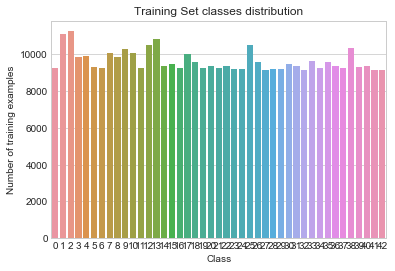

In [23]:
# Plot the number of examples of each sign in the training set after - pre process & image augmentation
sns.countplot(y_train)
plt.ylabel('Number of training examples')
plt.xlabel('Class')
plt.title('Training Set classes distribution')
plt.show()

In [24]:
# Compute the max and min observations

dist = np.histogram(y_train, bins=n_classes)
classes = dist[1]
counts = dist[0]
max_count = max(counts)
min_count = min(counts)

print("Max observations for a class:", max_count)
print("Min observations for a class:", min_count)

Max observations for a class: 11250
Min observations for a class: 9120


### Preprocessing approach
(1) Post ingestion of fake data is large amount, we translate same to GRAY scale from RGB. Also normalised and done a level of encoding. Same set visualized again and rpresented through histogram summary.
(2) RGB to Gray Scale - As per curriculam material gray scale image gives better performance. Additioanlly this will make easier to train our network and having sufficient image information to identify
(3) Normalization - a min-max approach is applied to normalize data sets. Same methodology we practice in TensorFlow lab wherein given good performance. 

### Dataset Spliting
We start with datasets X_train_preprocessed & y_train_preprocessed. In order to evaluate the performance of the network while tweaking its hyperparameters we must not use y_train_preprocessed, since we would indirectly be overfitting to this data.

Instead, We have created validation_set, that we use for evaluating network performance. It is also called as development set. This set is a subset of the complete X_train_preprocessed set. We perform the splitting using the sklearn.model_selection.train_test_split function.

Abstract of data set classification:
    1. X_train_final: 90% of X_train_preprocessed
    2. X_dev_final: 10% of X_train_preprocessed
    3. y_train_final: y_train_preprocessed (unchanged)


Training set


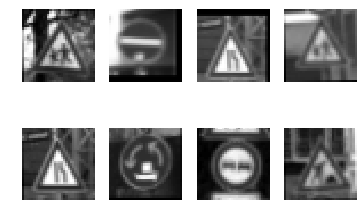

In [25]:
### Dataset splitting
validation_size = 0.1
X_train_final, X_dev_final, y_train_final, y_dev_final = \
sklearn.model_selection.train_test_split(X_train_preprocessed, y_train_preprocessed, random_state=918273645)

# Plot a few images to see if they look good
print('Training set')
plt.figure()
for i in range(8):
    plt.subplot(2, 4, i + 1);
    plt.imshow(np.squeeze(X_train_final[i, :, :, :]), cmap='gray');
    plt.axis('off');

Validation set


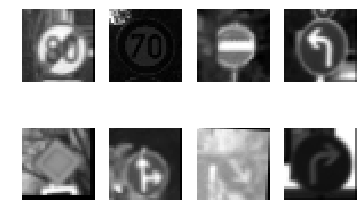

In [26]:
print('Validation set')
plt.figure();
for i in range(8):
    plt.subplot(2, 4, i + 1);
    plt.imshow(np.squeeze(X_dev_final[i, :, :, :]), cmap='gray');
    plt.axis('off');

### Model Architecture

#### Common functions
This section define a set of common functions leveraged by other layersof network. 

In [27]:
def create_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=STD_DEV))     
def create_biases(shape):    
    return tf.Variable(tf.zeros(shape) + BAIS_STD_DEV)
def flatten_layer(layer):   
    layer_shape = layer.get_shape()  # Shape is [batch_size, img_h, img_w, img_depth] 
    num_features = layer_shape[1:4].num_elements() # Number of features per image
    # Must reshape into [batch_size, n_features]. Since the batch_size is unknown
    return tf.reshape(layer, [-1, num_features])  # we type -1 so tf will figure it out itself

#### Define a structure for convolution layer
This function define a convolution layer, taking a 4D tensor of shape (batch_size, width, height, depth). The description of parameters is filter size, number of filters, options to include max pooling layer, ReLU and droupout. 

For better understanding review - https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
it gives - 
    (1) conventions about input shapes


In [28]:
# Prefer to use VALID padding herein instead of SAME

def create_conv_layer(input_layer,               # 4D tensor
                      filter_size,               # scalar
                      n_filters,                 # scalar
                      use_pooling=True,          # boolean
                      use_relu=True,             # boolean
                      dropout_keep_prob=None     # tensor variable
                     ):    
    
    # Create weights (4D tensor) and biases (1D vector)
    input_depth = int(input_layer.get_shape()[3])
    weight_shape = [filter_size, filter_size, input_depth, n_filters]
    bias_shape = [n_filters]
    
    weights = create_weights(weight_shape)
    biases = create_biases(bias_shape)
    
    # Convolution 2D
    layer = tf.nn.conv2d(input=input_layer, 
                         filter=weights,
                         strides=[1,1,1,1], 
                         padding='SAME')
    # Add bias
    layer = tf.nn.bias_add(layer, biases)
    
    # Max pooling
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1,2,2,1],
                               strides=[1,2,2,1],
                               padding='SAME')
    
    # ReLU. Should be applied before pooling. However the result is the same and in this
    # case we perform fewer computations, since there are fewer pixels
    if use_relu:
        layer = tf.nn.relu(layer)
    
    # Dropout
    if dropout_keep_prob is not None:
        layer = tf.nn.dropout(layer, dropout_keep_prob)
    
    return layer

#### A fully connect layer 
This function creates a fully connected layer, taking as input a 2D matrix of shape [batch_size, n_features] and having a number of outputs as a parameter. It also includes an optional boolean argument to include ReLU and dropout.

In [29]:
def create_fc_layer(input_layer,               # 2D matrix [batch_size, n_inputs]
                    n_outputs,                 # scalar
                    use_relu=True,             # scalar
                    dropout_keep_prob=None     # tensor variable
                   ):        

    n_inputs = int(input_layer.get_shape()[1])
    weights = create_weights([n_inputs, n_outputs])
    biases = create_biases([n_outputs])
    
    # XW + b
    layer = tf.matmul(input_layer, weights)
    layer = tf.nn.bias_add(layer, biases)
    
    # ReLU
    if use_relu:
        layer = tf.nn.relu(layer)
    
    # Dropout
    if dropout_keep_prob is not None:
        layer = tf.nn.dropout(layer, dropout_keep_prob)
    
    return layer

#### Network parameter 
This sections define sizes of layers of network

In [30]:
### Network parameters
# Input
img_size_w = X_train_final.shape[1]
img_size_h = X_train_final.shape[2]
img_size_d = X_train_final.shape[3]
img_size_total = img_size_w * img_size_h * img_size_d

# Conv layer 1
conv1_filter_size = 5
conv1_n_filters = 16

# Conv layer 2
conv2_filter_size = 5
conv2_n_filters = 32

# Conv layer 3
conv3_filter_size = 5
conv3_n_filters = 64

# Conv layer 4
conv4_filter_size = 5
conv4_n_filters = 128

# Fully Connected 1
fc1_n_neurons = 512

# Fully Connected 2
fc2_n_neurons = n_classes

#### Placeholder variables 
This section defines variable which we pass into tensorflow as inputs.

In [31]:
### Placeholder variables
# Input: batch of images - 4D tensor [batch_size, img_h, img_w, img_d]
x = tf.placeholder(tf.float32, shape=[None, img_size_h, img_size_w, img_size_d])

# Output: true class - 2D matrix, one-hot encoded value [batch_size, n_classes]
y_true = tf.placeholder(tf.float32, shape=[None, n_classes])

# True class (not hot encoded) vector [batch_size]
y_true_class = tf.argmax(y_true, dimension=1)
# y_true_class = tf.argmax(y_true, axis=0, name=None)

# Dropout keep probability
dropout_keep_p = tf.placeholder(tf.float32)

print('x = ', x)
print('y_true = ', y_true)

Instructions for updating:
Use the `axis` argument instead
x =  Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32)
y_true =  Tensor("Placeholder_1:0", shape=(?, 43), dtype=float32)


In [32]:
### Network architecture
# First Layer: Conv + ReLU + Max pool
conv1 = create_conv_layer(input_layer=x,
                          filter_size=conv1_filter_size,
                          n_filters=conv1_n_filters,
                          use_pooling=True,
                          use_relu=True,
                          dropout_keep_prob=dropout_keep_p)
print("Layer 1 = ", conv1)

Layer 1 =  Tensor("dropout/mul:0", shape=(?, 16, 16, 16), dtype=float32)


In [33]:
# Second Layer: Conv + ReLU + Max pool
conv2 = create_conv_layer(input_layer=conv1,
                          filter_size=conv2_filter_size,
                          n_filters=conv2_n_filters,
                          use_pooling=True,
                          use_relu=True,
                          dropout_keep_prob=dropout_keep_p)
print("Layer 2 = ", conv2)

Layer 2 =  Tensor("dropout_1/mul:0", shape=(?, 8, 8, 32), dtype=float32)


In [34]:
# Third Layer: Conv + ReLU + Max pool
conv3 = create_conv_layer(input_layer=conv2,
                          filter_size=conv3_filter_size,
                          n_filters=conv3_n_filters,
                          use_pooling=True,
                          use_relu=True,
                          dropout_keep_prob=dropout_keep_p)
print("Layer 3 = ", conv3)

Layer 3 =  Tensor("dropout_2/mul:0", shape=(?, 4, 4, 64), dtype=float32)


In [35]:
# Fourth Layer: Conv + ReLU + Max pool
conv4 = create_conv_layer(input_layer=conv3,
                          filter_size=conv4_filter_size,
                          n_filters=conv4_n_filters,
                          use_pooling=True,
                          use_relu=True,
                          dropout_keep_prob=dropout_keep_p)
print("Layer  4= ", conv4)

Layer  4=  Tensor("dropout_3/mul:0", shape=(?, 2, 2, 128), dtype=float32)


In [36]:
# Fifth Layer: Fully Connected + ReLU
flattened_conv4 = flatten_layer(conv4)
print(flattened_conv4)
fc1 = create_fc_layer(input_layer=flattened_conv4,
                      n_outputs=fc1_n_neurons,
                      use_relu=True,
                      dropout_keep_prob=dropout_keep_p)
print("FC 1 = ", fc1)

Tensor("Reshape:0", shape=(?, 512), dtype=float32)
FC 1 =  Tensor("dropout_4/mul:0", shape=(?, 512), dtype=float32)


In [37]:
# Fifth Layer: Fully Connected
# NOTE: ReLU is not used, since the output will go directly to the Softmax function
fc2 = create_fc_layer(input_layer=fc1,
                      n_outputs=fc2_n_neurons,
                      use_relu=False,
                      dropout_keep_prob=None)
print("FC 2 = ", fc2)

FC 2 =  Tensor("BiasAdd_5:0", shape=(?, 43), dtype=float32)


In [38]:
# Softmax
y_predicted = tf.nn.softmax(fc2)
y_predicted_class = tf.argmax(y_predicted, dimension=1)
# y_predicted_class = tf.argmax(y_predicted, axis=0, name=None)
print(y_predicted)

Tensor("Softmax:0", shape=(?, 43), dtype=float32)


In [39]:
### Optimization
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc2,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)

learning_rate = 0.0005
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#### Performance Evaluation
Finally, we define the computations required in order to obtain the training, validation and test accuracy, with which we can evaluate the performance of the proposed network.

In [40]:
### Performance evaluation
# Check if the predicted class is equal to the true class
is_correct_prediction = tf.equal(y_predicted_class, y_true_class)

# Compute the accuracy by averaging out the previous variable
accuracy = 100.0 * tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

### Network Training
This section trains the network by setting epochs and batch sizes. 

In [41]:
# Number of batch preparation for network taining
n_batches = int(np.floor(X_train_final.shape[0] / train_batch_size))
print ("Training the network for %d epochs." % n_epochs)
print ("The batch size is %d, and there are %d training examples, so we use %d batches per epoch" % (train_batch_size, X_train_final.shape[0], n_batches))

Training the network for 225 epochs.
The batch size is 100, and there are 310332 training examples, so we use 3103 batches per epoch


##### Another set of common functions

In [42]:
# Helper function to get a batch from a dataset
def get_batch(x, y, batch_size, batch_idx):
    max_size = x.shape[0]
    start_idx = batch_idx * batch_size

    x_batch = x[start_idx : np.minimum(start_idx + batch_size, max_size), :, :, :]
    y_batch = y[start_idx : np.minimum(start_idx + batch_size, max_size), :]
    
    return (x_batch, y_batch)

In [43]:
def get_test_accuracy(x_data, y_data, batch_size):
    n_batches = int(np.ceil(x_data.shape[0] / batch_size))
    accuracies = np.zeros([n_batches])

    for i in range(n_batches):
         # Get batch
        batch_x, batch_y = get_batch(x_data, y_data, batch_size, i)
        
        # Create feed dictionary
        feed_data = {x: batch_x, y_true: batch_y, dropout_keep_p: 1.0}

        # Feed it to the network and update the weights
        accuracies[i] = sess.run(accuracy, feed_dict=feed_data)
       
    return np.mean(accuracies)

In [44]:
# Create TensorFlow session
sess = tf.Session()

In [45]:
# Train network
training_accuracy = []
validation_accuracy = []

desired_validation_acc = 99.5  # %

if network_model_dir is None:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    shuffle_idx = np.arange(0, X_train_final.shape[0])

    for i_epoch in range(n_epochs):
        # Shuffle training data
        np.random.shuffle(shuffle_idx)   
        X_train_final = X_train_final[shuffle_idx]
        y_train_final = y_train_final[shuffle_idx]

        # Loop through batches
        for i_batch in range(n_batches):
            # Get batch
            batch_x_train, batch_y_train = get_batch(X_train_final, y_train_final, train_batch_size, i_batch)

            # Create feed dictionary
            feed_data_train = {x: batch_x_train, y_true: batch_y_train, dropout_keep_p: 0.5}

            # Feed it to the network and update the weights
            sess.run(optimizer, feed_dict=feed_data_train)       

        # Compute the training and validation accuracy for each epoch
        feed_data_train_acc = {x: batch_x_train, y_true: batch_y_train, dropout_keep_p: 1.0}    
        training_acc_i = sess.run(accuracy, feed_data_train_acc)

        validation_acc_i = get_test_accuracy(X_dev_final, y_dev_final, test_batch_size)

        training_accuracy.append(training_acc_i )
        validation_accuracy.append(validation_acc_i)
        print('Epoch %3d - training acc: %3.1f%%, validation acc: %3.1f%%'
              % (i_epoch, training_acc_i, validation_acc_i))

Epoch   0 - training acc: 65.0%, validation acc: 66.9%
Epoch   1 - training acc: 89.0%, validation acc: 89.1%
Epoch   2 - training acc: 95.0%, validation acc: 93.5%
Epoch   3 - training acc: 92.0%, validation acc: 96.1%
Epoch   4 - training acc: 97.0%, validation acc: 96.7%
Epoch   5 - training acc: 97.0%, validation acc: 97.3%
Epoch   6 - training acc: 99.0%, validation acc: 97.7%
Epoch   7 - training acc: 98.0%, validation acc: 98.0%
Epoch   8 - training acc: 99.0%, validation acc: 98.2%
Epoch   9 - training acc: 98.0%, validation acc: 98.4%
Epoch  10 - training acc: 99.0%, validation acc: 98.5%
Epoch  11 - training acc: 99.0%, validation acc: 98.4%
Epoch  12 - training acc: 98.0%, validation acc: 98.8%
Epoch  13 - training acc: 99.0%, validation acc: 98.8%
Epoch  14 - training acc: 100.0%, validation acc: 98.8%
Epoch  15 - training acc: 100.0%, validation acc: 98.9%
Epoch  16 - training acc: 99.0%, validation acc: 98.6%
Epoch  17 - training acc: 99.0%, validation acc: 98.8%
Epoch  1

Epoch 148 - training acc: 100.0%, validation acc: 99.5%
Epoch 149 - training acc: 99.0%, validation acc: 99.4%
Epoch 150 - training acc: 100.0%, validation acc: 99.4%
Epoch 151 - training acc: 100.0%, validation acc: 99.4%
Epoch 152 - training acc: 98.0%, validation acc: 99.4%
Epoch 153 - training acc: 100.0%, validation acc: 99.4%
Epoch 154 - training acc: 100.0%, validation acc: 99.4%
Epoch 155 - training acc: 100.0%, validation acc: 99.5%
Epoch 156 - training acc: 99.0%, validation acc: 99.5%
Epoch 157 - training acc: 100.0%, validation acc: 99.4%
Epoch 158 - training acc: 100.0%, validation acc: 99.3%
Epoch 159 - training acc: 100.0%, validation acc: 99.4%
Epoch 160 - training acc: 100.0%, validation acc: 99.3%
Epoch 161 - training acc: 98.0%, validation acc: 99.3%
Epoch 162 - training acc: 100.0%, validation acc: 99.4%
Epoch 163 - training acc: 100.0%, validation acc: 99.3%
Epoch 164 - training acc: 99.0%, validation acc: 99.4%
Epoch 165 - training acc: 100.0%, validation acc: 99.

#### Saving the network parameters

In [46]:
if network_model_dir is None:
    # Same the network parameters
    saver = tf.train.Saver()
    model_dir = os.path.join('model', time.strftime("%Y%m%d_%H%M%S"))
    if not os.path.isdir(model_dir):
        os.mkdir(model_dir)
    save_path = os.path.join(model_dir, 'model.ckpt')
    saver.save(sess, save_path);
    
    # Save metainfo about the training
    training_curve_file = os.path.join(model_dir, 'training_info.pickle')
    with open(training_curve_file, mode='wb') as f:
        pickle.dump({'training_acc': training_accuracy, 'validation_acc': validation_accuracy}, f)

#### Restoring network paramters

In [47]:
if network_model_dir is not None:
    saver = tf.train.Saver()
    saver.restore(sess, os.path.join(network_model_dir, 'model.ckpt'))
                  
    training_info_file = os.path.join(network_model_dir, 'training_info.pickle')
    with open(training_info_file, 'rb') as f:
        d = pickle.load(f)
        
        training_accuracy = d['training_acc']
        validation_accuracy = d['validation_acc']

Training accuracy: 98.0%
Validation accuracy: 99.4%


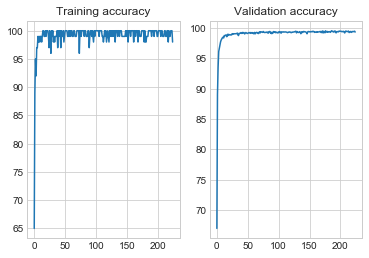

In [48]:
# Plot training and validation accuracy, and print the final value
iteration_vector = range(len(training_accuracy))

plt.subplot(121)
plt.plot(iteration_vector, np.array(training_accuracy));
plt.title('Training accuracy');

plt.subplot(122)
plt.plot(iteration_vector, np.array(validation_accuracy));
plt.title('Validation accuracy');

final_train_acc = training_accuracy[-1]
final_val_acc = validation_accuracy[-1]
   
print("Training accuracy: %.1f%%" % final_train_acc)
print('Validation accuracy: %.1f%%' % final_val_acc)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [49]:
print('Test accuracy: %.1f%%' % get_test_accuracy(X_test_preprocessed, y_test_preprocessed, test_batch_size))

Test accuracy: 95.3%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [50]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Helper functions to process the input images
def load_img(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def crop_img(img, crop_info):
    crop_x1 = crop_info[0]
    crop_y1 = crop_info[1]
    crop_size = crop_info[2]
    
    return img[crop_y1:crop_y1 + crop_size, crop_x1:crop_x1 +  crop_size, :]
    
def resize_img(img, new_size):
    return cv2.resize(img, new_size)

## Read CSV containing: image path, crop_x, crop_y, class


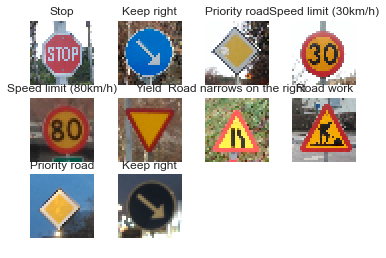

In [51]:
# Read CSV containing: image path, crop_x, crop_y, class
test_img_csv = 'test_img/test_img.csv'

n_tests = 10
X_test_own = np.zeros([n_tests, img_size_h, img_size_w, 3], dtype=np.float32)
y_test_own_labels = np.zeros([n_tests], dtype=int)

resize_size = (img_size_h, img_size_w)

with open(test_img_csv, 'r') as csvfile:
    i_img = 0
    reader = csv.reader(csvfile, delimiter=',')    
    for row in reader:
        # Read information from CSV file
        filename = row[0]
        crop_info = np.array(row[1:4], dtype=int)
        img_class = row[4]
        
        # Update test set
        img = load_img(filename)
        img = crop_img(img, crop_info)
        img = resize_img(img, resize_size)
        
        X_test_own[i_img, :, :, :] = img
        y_test_own_labels[i_img] = labels_text.index(img_class);
        
        # Plot image
        plt.subplot(3, 4, i_img+1)
        plt.imshow(img);
        plt.title(img_class);
        plt.axis('off')
        i_img = i_img + 1

# Preprocessing
X_test_own = preprocess_set(X_test_own)
y_test_own = one_hot_encoding(y_test_own_labels, n_classes)

### Predict the Sign Type for Each Image

### Analyze Performance

##### Run the predictions here and use the model to output the prediction for each image.
##### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
##### Feel free to use as many code cells as needed.

# Prediction

In [52]:
# Prediction
y_pred_own_class = sess.run(y_predicted_class, feed_dict={x: X_test_own, dropout_keep_p: 1.0})

for i in y_pred_own_class.astype(int):
    print(labels_text[i])

Stop
Keep right
Priority road
Speed limit (30km/h)
Speed limit (80km/h)
Yield
Road narrows on the right
Right-of-way at the next intersection
Priority road
Keep right


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

#### The goals / steps of this project are the following:
 (a) Load the data set (see below for links to the project data set)
 (b) Explore, summarize and visualize the data set
 (c) Design, train and test a model architecture
 (d) Use the model to make predictions on new images
 (e) Analyze the softmax probabilities of the new images
 (f) Summarize the results with a written report

#### Project Approach :
First tried exactly Lenet framework (MNIST) without any normalization and dropout. The accuracy of trained model merely touch to 90%. Thereafter gone for incremental approach of extendeding network as taught in curriculam lectures for tuning of hyperprameter, avoiding overfitting, normalization of inputs and preparation of fake data etc. The work couldnot accomplished without leveraging work of earlier Udacians. I learned several models of ex-student and also picked up their function for achieving objectives. Eventual outcome depends a lot on parameteric tunning, setup and used environment.

#### 1.0 Setup used to accomplish project
(a) Ubuntu 17.10, CuDDA 8.0 and CuDNN 6.0 
(b) System Configuration i7 core, GPU Nivida GeForce 1066
(c) Conda environment - with OpenCV, TensorFlow and a lot utilities
(d) Initial shalls outlines utilities leveraged in project - import or from

###### Alternatively 
i have tried AWS Udacity AMI & Windows setup as well for project development however dependencies stuck work in between

Various project sections are elobrated in subsequent sections of project write up.

#### 2.0 Data Input & Visualizations

##### Data Input, Loading and Libraries/Utilities 
All utilities, libraries and math frameworks required in network processing get imported in begining, as a summary they are - tensorflow, pandas, numpy, random, itertools, pickle, matplotlib inline, sklearn, csv, zipfile, urllib, urlretrieve,time, datetime, math, os and seaborn.

###### Data Input & Visualization [ Basics ] 
Leveraging OS, urllib and urlretrieve downloaded data set in zip format from WEB thereafter retrieved by zipfile. The extracted files train.pickel and test.pickel are renamed as train.p and test.p

Using Python basic summary of taining and test data set prepared, which is as enlisted:


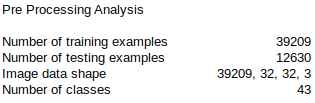

Randomly select one image (index) and plot in 1 by 1 form factor.Same extended further by randomly selecting one index for each class and visualized by plot

4 

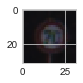


###### Detailed analysis & visualization of whole data set - train.p & test.p
A statistical analysis of training and test data (original & downloaded)is done to classify number of samples of each class. Panda read CSV, DataFrame and classes group analysis plot visualization helped in understanding training baises here is a snap of result

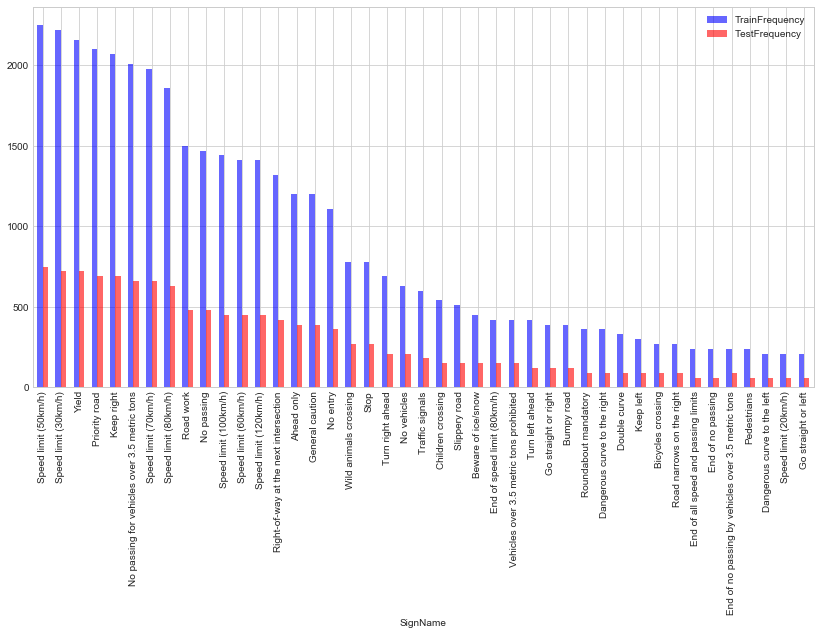

##### Traffic sign data summary, analysis and observations [Statistical Analysis]
Data sample statitics of each symbol plotted in acending order by leveraging Panda. Data example plot summary clearly depicts examples are not equally distributed. The examples who have more sample for training will give more accuracy, rest sign may have lesser accuracy. If we want to improve DNN/CNN network's ability to generalize, we should have nearly same number of examples for each class and in high numbers.

##### Pictorial visualisation - Random Sample
Alternatively, Panda and GridSpec used for graphical summary of data set, histogramic representation and visual impression of every class. Visual impression of each class gives us a sense of images quality and size used in training processs. 

![image.png](attachment:image.png)

#### 3.0 Data Preprocessing, Normalization & Augmentation

#### Data preprocess approach taken 

(a) Shuffle data set - randomize training data
(b) Create equal amount of fake data by applying following approach 
       * Transformation mechanism
       * Rotation
       * Shift
       * Offset
       * Shear
(c) Gray scaling of data images

###### Data Augmentation 
In pre processing by fake data ingestion  approx 10x amount of image data added into original data set. Network accuracy depends of amount of available training data. By basic analysis (first iteration of Lenet) i sensed this much data is not allowing us to incease accuracy beyond 90%

As mentioned in video lecture's RGB data set is having 3 times colour information which could be slashed by gray scale mechanism and nearly same level of results could be achieved. Moreover RGB increases compute overheads and time of training a network. 

Shuffling data dilutes any sort of baises in available datasets i.e bring randomization. Post preprocessing data statitics are ploted and visualize in picture.

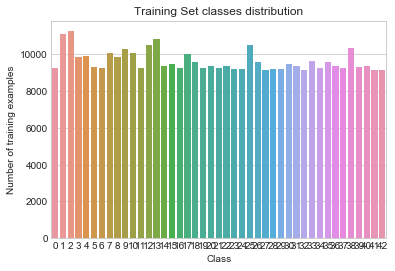

###### Preprocessing - GrayScaling & Normalization
(a) Post ingestion of good amount of fake data we translate each sample from RGB to GRAY scale. Also normalised and done a level of encoding. Same set visualized again and represented through histogram summary (as depicted in previous section). 

(b) RGB to Gray Scale : As per curriculam material gray scale image gives better performance. Additioanlly this will make easier to train our network and having sufficient image information to identify so used OpenCV functionality to achieve this. One more approach tried however found that compute intensive.
(c) Normalization : a min-max approach is applied to normalize data sets. Same methodology we practiced in TensorFlow learning lab wherein it gave good performance.

(d) Augmentation - As described above post approx 10x amount of fake data added to augment data set in hand 

![image.png](attachment:image.png)

##### Statitics of extended training set in size

![image.png](attachment:image.png)

##### Post preprocessing visualisation 
(a) ClassId, SignName - listing published for better understanding of training and test samples) 
(b) To visualize gray scale images before training model - few samples published for view before training. 

##### Abstract of data set classification:

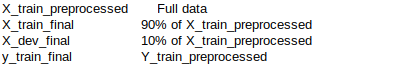

#### 4.0 Network Design & Parameters

Network designed by combining 4 convolution layer and 2 fully connected layers, configuration of each layer is such as;

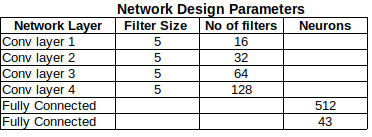

##### Learning parameters, batch size & othe hyperparameters

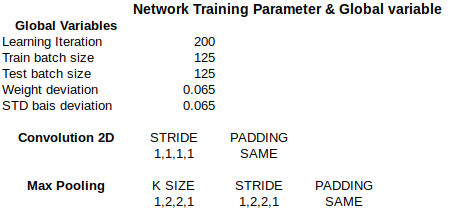

##### Fully Connected Layer
This function creates a fully connected layer, taking as input a 2D matrix of shape [batch_size, n_features] and having a number of outputs as a parameter. It also includes an optional boolean argument to include ReLU and dropout.

##### Model training results:
Model get training by TensorFlow session with above described netwrok parameters. Herewith find a snap of network training and testing data accuracy level statitics plot.

Training accuracy: 98.0%
Validation accuracy: 99.4%
Testing accuracy : 95.3%

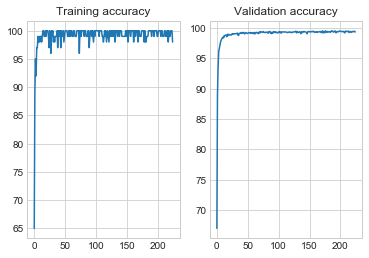


##### Additional Observations
###### Hyperparameters 
Lenet model - Once MNIST lenet model as is tried for traffic sign data learning. Basic pre processing was tried with images - shift, rotation, transformation and other common approaches. The model learning result give a outcome training accuracy 98%, validation accuracy 98% and testing accuracy 89%. While this model used to predict independent data (fetch from web) the accuracy found approx 75%. 

Herein this model i haven't tried recommended pre processing mechanism like image gray scaling, normalization, data augmentation for training, padding and dropout etc.   

#### Alternative approach for improvised model
In improvised model adopted all missing pre processing techniques. Gray scaling, normalization, data augmentation for training, padding and dropout etc are inculcated in network. 

Second network enhacement done by adopting 4 Conv, 2 fully connected layer and hyper parameters tunning. These modifications give better result with 95% plus accuracy on independent data's.


###### Normalization
Planned to do normalization and converting COLOR inputs into gray scale (on base Lenet). Thought process was to leverage CV2 functionalities for input images. To avoid setup related concerns i have preffered to use UDACITY AWS AMI and Instance (with GPU) for same purpose. However, seems current version of AWS instance have some dependency issue therefore got stuck in this step. 
Henceforth an alternative approch of laptop grade GPU/CuDA/CuDNN setup planned to setup and run project.

#### 4.0 Analysis

#### Test a Model on New Images

Here is representation of ten traffic signs used for testing of network
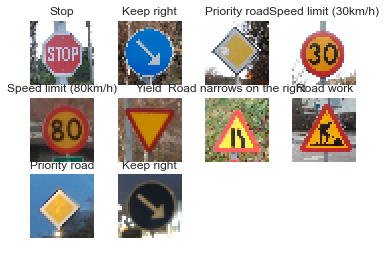

#### Here are the results of the model prediction:
#### (1) Stop
#### (2) Keep right
#### (3) Priority road
#### (4) Speed limit (30km/h)
#### (5) Speed limit (80km/h)
#### (6) Yield
#### (7) Road narrows on the right
#### (8) Right-of-way at the next intersection
#### (9) Priority road
#### (10) Keep right

### Final result analysis (Independent Data)
All independent images successfully identified by network. 

#### Final test accuracy : 100%

#### 5.0 Challenges & Improvisation scopes
#### Challenges and prospects of improvisation:
(1) SETUP Concerns 
My local setup has GPU/CPU high processing system with dual OS (Windows 10 and Ubuntu 17.04) so tried virtualized docker and a native setups with conda flavor. 

However i found a lot many dependency issues. I feel growth of DNN/CNN from business standpoint depends on how solutions will be ported, dessiminated and easily deployed on varying nature of platforms. Also, tried AWS Udacity AMI setup wherein encountered with a few shared object file issues. Dependency concerns burn a lot of energy and drifted focus from core work.  

Researcher fraternity needs to focus more on this dimension !!
   
(2) Model standpoint few more combination of conv and FC could be tried for further improvise accuracy.
(3) On German site a good amount of data in different format is availabe which could be leveraged for training and testing accuracy improvisation

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [65]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")